# <center>“Identification of high-risk COVID-19 patients using machine learning” </center>
#### <center> Introduction to Data Science</center>
#### <center> Faculdade de Ciências da Universidade do Porto </center>
##### <center> December 2022 - intermediate submission</center>

<p   
   style='text-align: center;'>Group E:
<br>
Francisco Rolo (up202203838)
<br>
José Eduardo Pereira (up202204480)
<br>
Nuno Fernandes (up202109069)
</p>

***

## 1 - Business understanding
### Determine Business Objectives
##### Background:
COVID-19 pandemic introduces great distress in the world by impacting severely all healthcare systems and the way social interactions are made, due to being a highly contagious disease. Leading to profound economic disruptions in people's normal way of life.

##### Business Objectives:
Understand how the disease impacts individuals given certain characteristics in order to improve hospital capacity planning and timely treatment.

##### Business Success Criteria:
Identify high-risk patients with high accuracy.

##### Machine Learning Problem: 
Create a model that can classify an individual as a high-risk or low-risk given the impact of the disease in previous patients.

##### Machine Learning Success Criteria: 
Correctly classifying the patients.

### Assess Situation
##### Inventory of Resources:
    - 3 students from introduction to data science course
    - a database of confirmed and suspected COVID-19 infections in Mexico
    - jupyter notebook
##### Requirements, Assumptions & Constraints:
    - final deadline is January 12th 2023
    - 5 minutes presentation in the class of 16th of December
    - intermediate submission on December 16: html version of the notebook with the first 2 CRISP-DM phases and part of the 3rd
    - we assume data is complete, reliable and understandable
##### Risks and Contingencies
Non-Applicable due to being a school project
##### Terminology
(Table with variables and meaning, will be added later on)
##### Costs and Benefits
Non-Applicable due to being a school project

## 2 - Data Understanding
### Collect Initial Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

from sklearn import datasets

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv("covid19Mexico_Apr2020_Jan2021.csv")
#df=df.sample(10000,random_state=123)
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
1,2021-10-31,z4d6fe,1,6,24,1,24,24,28,1,...,2,1,1,2,97,3,99,México,97,97
2,2021-10-31,z1e370,1,12,14,1,14,14,85,1,...,2,1,2,2,97,7,99,México,97,97
3,2021-10-31,z3bf80,2,12,8,2,8,8,37,1,...,2,1,1,2,97,3,99,México,97,97
4,2021-10-31,zz7067,1,12,9,2,9,9,7,1,...,2,1,2,2,97,7,99,México,97,97
5,2021-10-31,z393a3,1,12,9,1,9,9,17,1,...,1,2,97,1,2,7,99,México,97,97


### Describe Data

In [3]:
print("The dataset has",df.shape[0],"cases and",df.shape[1],"features")

The dataset has 10000 cases and 40 features


In [4]:
df.describe(include = "all")

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
count,10000,10000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.00000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000
unique,1,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,13,NaN
top,2021-10-31,3c163a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,México,97,NaN
freq,10000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9941,9982,NaN
mean,NaN,NaN,1.684700,9.46970,14.316300,1.490100,15.462900,14.63260,31.92120,1.13000,...,7.103100,1.196400,20.370600,1.855300,83.218300,5.223400,98.455000,NaN,NaN,84.775500
std,NaN,NaN,0.464658,3.58181,7.946494,0.499927,10.143585,7.88443,43.32362,0.33632,...,22.662754,0.397294,37.890128,0.351816,33.508472,1.983705,7.262895,NaN,NaN,31.831601
min,NaN,NaN,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.00000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000
25%,NaN,NaN,1.000000,4.00000,9.000000,1.000000,9.000000,9.00000,7.00000,1.00000,...,1.000000,1.000000,1.000000,2.000000,97.000000,3.000000,99.000000,NaN,NaN,97.000000
50%,NaN,NaN,2.000000,12.00000,11.000000,1.000000,14.000000,13.00000,17.00000,1.00000,...,2.000000,1.000000,2.000000,2.000000,97.000000,7.000000,99.000000,NaN,NaN,97.000000
75%,NaN,NaN,2.000000,12.00000,21.000000,2.000000,21.000000,21.00000,39.00000,1.00000,...,2.000000,1.000000,2.000000,2.000000,97.000000,7.000000,99.000000,NaN,NaN,97.000000


In [5]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2257025 to 2787889
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   FECHA_ACTUALIZACION    10000 non-null  object
 1   ID_REGISTRO            10000 non-null  object
 2   ORIGEN                 10000 non-null  int64 
 3   SECTOR                 10000 non-null  int64 
 4   ENTIDAD_UM             10000 non-null  int64 
 5   SEXO                   10000 non-null  int64 
 6   ENTIDAD_NAC            10000 non-null  int64 
 7   ENTIDAD_RES            10000 non-null  int64 
 8   MUNICIPIO_RES          10000 non-null  int64 
 9   TIPO_PACIENTE          10000 non-null  int64 
 10  FECHA_INGRESO          10000 non-null  object
 11  FECHA_SINTOMAS         10000 non-null  object
 12  FECHA_DEF              10000 non-null  object
 13  INTUBADO               10000 non-null  int64 
 14  NEUMONIA               10000 non-null  int64 
 15  EDAD       

From the 40 features, 33 are numerical and 7 are nominal.   
All cases have values for all features and therefore all the features have the same 3.779.640 cases.

Additional catalogues are provided by the Mexican Authorities with the features' description and the different possibilities that each one of the features can assume. In some cases, the missing values were previously replaced by numerical entries like 97, 98, 99, 997, 998, 999. 


### Explore Data

In [6]:
# understanding evolution over time 

df["FECHA_DEF"].replace({"9999-99-99": pd.NA}, inplace=True)
df['FECHA_INGRESO'] = pd.to_datetime(df['FECHA_INGRESO'],format="%Y/%m/%d")
df['FECHA_SINTOMAS'] = pd.to_datetime(df['FECHA_SINTOMAS'],format="%Y/%m/%d")
df['FECHA_DEF'] = pd.to_datetime(df['FECHA_DEF'],format="%Y/%m/%d")
fi = pd.DataFrame(df["FECHA_INGRESO"].value_counts())
fs = pd.DataFrame(df["FECHA_SINTOMAS"].value_counts())
fd = pd.DataFrame(df["FECHA_DEF"].value_counts())
fechas = pd.concat([fi,fs,fd], axis=1)
fechas.reset_index(inplace=True)

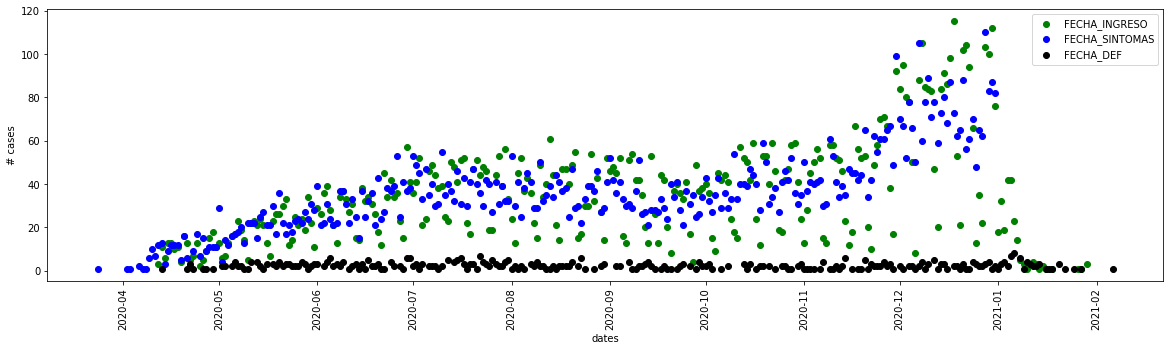

In [7]:
# plot scatter
plt.figure(figsize=(20,5))
plt.scatter(fechas['index'], fechas['FECHA_INGRESO'], label = "FECHA_INGRESO", color='green')
plt.scatter(fechas['index'], fechas['FECHA_SINTOMAS'], label = "FECHA_SINTOMAS", color='blue')
plt.scatter(fechas['index'], fechas['FECHA_DEF'], label = "FECHA_DEF", color='black')
plt.legend()
plt.xlabel('dates')
plt.xticks(rotation=90)
plt.ylabel('# cases')
plt.show()

In [8]:
tipo_1 = len(df[(df['TIPO_PACIENTE']==1)])
tipo_2 = len(df[(df['TIPO_PACIENTE']==2)])

In [9]:
print("number of positive outcomes:", tipo_1)
print("number of worst outcomes:", tipo_2)

number of positive outcomes: 8700
number of worst outcomes: 1300


<AxesSubplot:xlabel='TIPO_PACIENTE', ylabel='count'>

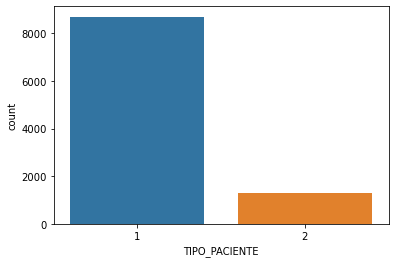

In [10]:
sns.countplot(data=df, x="TIPO_PACIENTE")

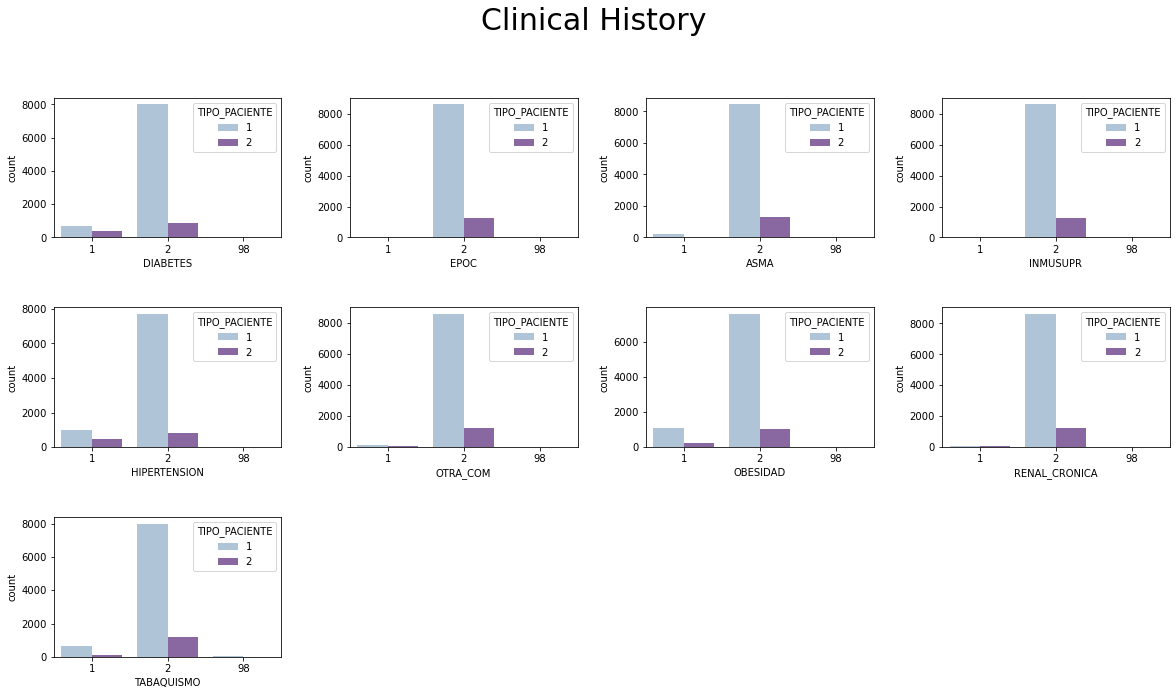

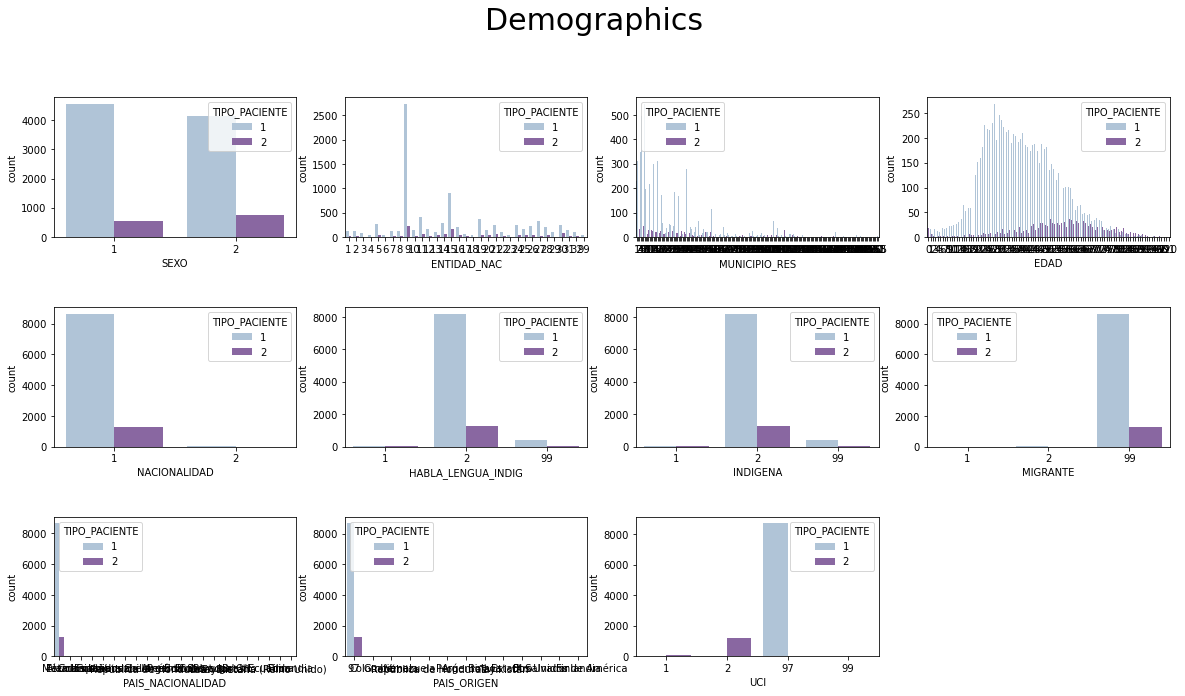

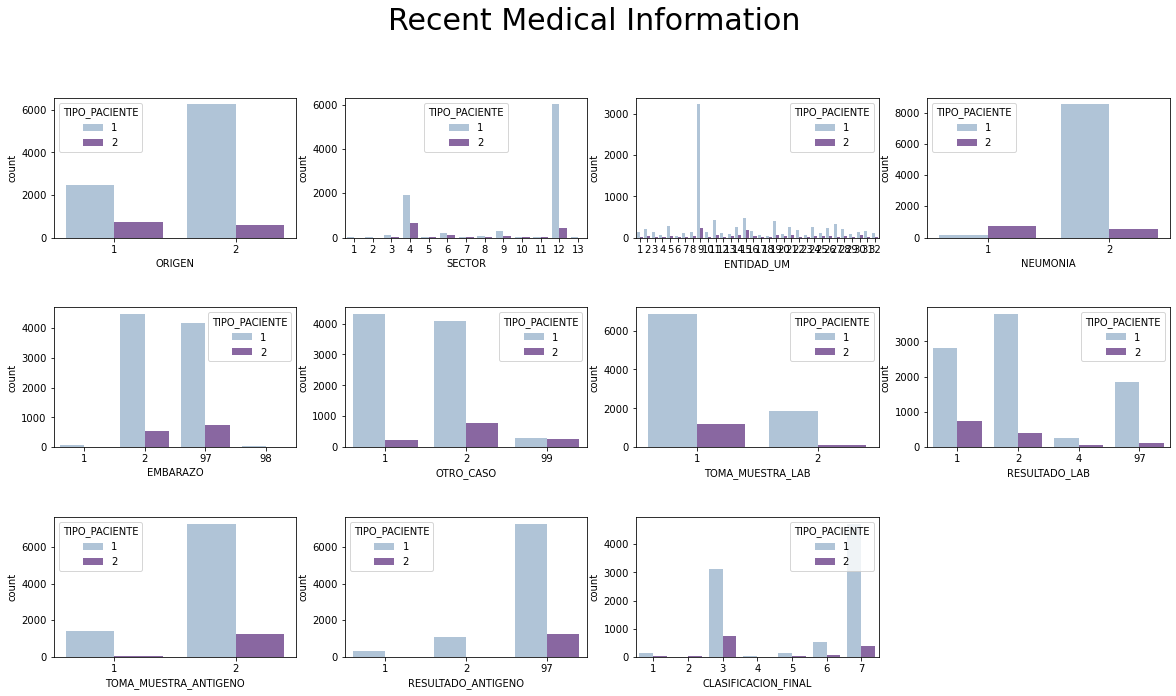

<Figure size 1440x1296 with 0 Axes>

In [11]:
features= df.loc[:, ~df.columns.isin(['FECHA_ACTUALIZACION', 'ID_REGISTRO','FECHA_INGRESO','FECHA_SINTOMAS', 'FECHA_DEF',"EDAD"])]
features = features.columns

categories = {"Clinical History":["DIABETES","EPOC","ASMA","INMUSUPR","HIPERTENSION","OTRA_COM","OBESIDAD","RENAL_CRONICA","TABAQUISMO","CARDIOVASCULAR"],"Demographics":["SEXO","ENTIDAD_NAC","MUNICIPIO_RES","EDAD","NACIONALIDAD","HABLA_LENGUA_INDIG","INDIGENA","MIGRANTE","PAIS_NACIONALIDAD","PAIS_ORIGEN"], "Recent Medical Information":["ORIGEN","SECTOR","ENTIDAD_UM","NEUMONIA","EMBARAZO","OTRO_CASO","TOMA_MUESTRA_LAB","RESULTADO_LAB","TOMA_MUESTRA_ANTIGENO","RESULTADO_ANTIGENO","CLASIFICACION_FINAL","UCI","INTUBADO"]}

#counter for printing ylabel each row
counter = 0

#figure size
plt.figure(figsize=(20, 18))

#subplots space
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.3)

#counter_length
counter_length = 0

ncols = 4
nrows = 5

#counter for plotting legend
counter_2 = 0

#legend only one time
counter_3 = 0

for key in categories:
    #main title
    plt.suptitle(key, fontsize=30, y = 0.95)

    # loop through the length of tickers and keep track of index
    for n, i in enumerate(categories[key]):

        # add a new subplot iteratively using nrows and cols
        ax = plt.subplot(nrows, ncols, n + 1)
        ax.set(xlabel=None)

        #data = data.compute()

        #scatterplot Time vs Value for each measure type
        ax = sns.countplot(data = df, x = i,hue = "TIPO_PACIENTE", palette = 'BuPu')

    plt.savefig('plot_'+str(counter_length)+'.png')

    #figure size
    plt.figure(figsize=(20, 18))

    #subplots space
    plt.subplots_adjust(hspace=0.5)


### Verify Data Quality

In [12]:
df['FD<FI']=df['FECHA_DEF']<df['FECHA_INGRESO']
df['FD<FI'].value_counts()

False    10000
Name: FD<FI, dtype: int64

In [13]:
df['FD<FS']=df['FECHA_DEF']<df['FECHA_SINTOMAS']
df['FD<FS'].value_counts()

False    10000
Name: FD<FS, dtype: int64

In [14]:
df['FI<FS']=df['FECHA_INGRESO']<df['FECHA_SINTOMAS']
df['FI<FS'].value_counts()

False    10000
Name: FI<FS, dtype: int64

##### Cases when dates follow an abnormal pattern, e.g., deaths' date prior to admission date.

[Text(0.5, 1.0, 'Age histogram (ages > 100)')]

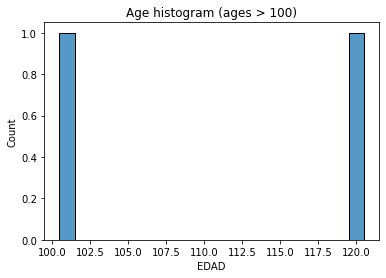

In [15]:
#Age: feature with an abnormal high value of values=120
sns.histplot(df['EDAD'].loc[df['EDAD'] > 100], binwidth=1, discrete=True).set(title='Age histogram (ages > 100)')

##### Ages until 120 years old will be considered. The histogram suggests some issue by attributing 120 years old to so many patients, which will be considered in the preprocessing stage.

## 3 -  Preprocessing


In [3]:
#Cleaning 'meaningless' values according to catalog

#Replace function not working
for i in df.columns:
    if not(i in ['FECHA_ACTUALIZACION', 'ID_REGISTRO','MUNICIPIO_RES', 'FECHA_INGRESO','FECHA_SINTOMAS', 'FECHA_DEF','EDAD','INTUBADO',"NEUMONIA",'FD<FI', 'FD<FS','FI<FS','DEAD','OTRO_CASO','TOMA_MUESTRA_LAB','RESULTADO_LAB','TOMA_MUESTRA_ANTIGENO','RESULTADO_ANTIGENO',"EMBARAZO","HABLA_LENGUA_INDIG","INDIGENA", "MIGRANTE","UCI"]):
        print(i)
        row_index = 0
        for row in df.loc[:,i]:
            col_index = df.columns.get_loc(i)
            if row in [97,98,99]:
                df.iloc[row_index,col_index] = 999
            row_index+=1


row_index = 0
for row in df.loc[:,"MUNICIPIO_RES"]:
    col_index = df.columns.get_loc(i)
    if row in [999,998,997]:
        df.iloc[row_index,col_index] = 999
    row_index+=1

ORIGEN
SECTOR
ENTIDAD_UM
SEXO
ENTIDAD_NAC
ENTIDAD_RES
TIPO_PACIENTE
NACIONALIDAD
DIABETES
EPOC
ASMA
INMUSUPR
HIPERTENSION
OTRA_COM
CARDIOVASCULAR
OBESIDAD
RENAL_CRONICA
TABAQUISMO
CLASIFICACION_FINAL
PAIS_NACIONALIDAD
PAIS_ORIGEN


In [4]:
#Cleaning age feature since it has an abnormal high value of values=120

#df['EDAD'].mask(df['EDAD'] == 120, pd.NA, inplace=True)

#_____ Instead ofNA if we want to substitute  for the mean
mean_age=df['EDAD'].mean()
df['EDAD'].mask(df['EDAD'] == 120, round(mean_age), inplace=True)
print("Age mean: ", mean_age)
#sns.histplot(df['EDAD'], binwidth=1, discrete=True)


Age mean:  41.283576213607645


##### Creation of variable for cases where patients died (Fecha_DEF not null)

In [19]:
df["DEAD"]=np.where(df["FECHA_DEF"].isnull(),pd.NA,1)

<AxesSubplot:xlabel='DEAD', ylabel='count'>

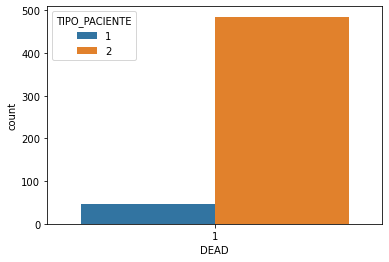

In [20]:
sns.countplot(data=df, x = "DEAD",hue = "TIPO_PACIENTE")

##### As one may observe in the figure above, there are some patients classified as a Positive outcome (Tipo Paciente) that have died.

<AxesSubplot:xlabel='DEAD', ylabel='count'>

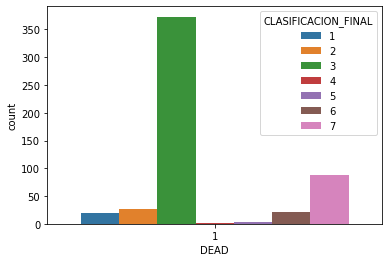

In [21]:
sns.countplot(data=df, x = "DEAD",hue = "CLASIFICACION_FINAL")

##### Distribution of people who died accordingly to their Clasificacion Final.

In [5]:
df = df.loc[:,~df.columns.isin(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'FECHA_INGRESO','FECHA_SINTOMAS', 'FECHA_DEF'])].apply(lambda x: x.astype('category'))

df["EDAD"] = df["EDAD"].astype('int')


In [23]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2257025 to 2787889
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ORIGEN                 10000 non-null  category
 1   SECTOR                 10000 non-null  category
 2   ENTIDAD_UM             10000 non-null  category
 3   SEXO                   10000 non-null  category
 4   ENTIDAD_NAC            10000 non-null  category
 5   ENTIDAD_RES            10000 non-null  category
 6   MUNICIPIO_RES          10000 non-null  category
 7   TIPO_PACIENTE          10000 non-null  category
 8   INTUBADO               10000 non-null  category
 9   NEUMONIA               10000 non-null  category
 10  EDAD                   10000 non-null  int64   
 11  NACIONALIDAD           10000 non-null  category
 12  EMBARAZO               10000 non-null  category
 13  HABLA_LENGUA_INDIG     10000 non-null  category
 14  INDIGENA               10000 n

### Logistic Regression

In [6]:
df = df.loc[:, ~df.columns.isin(["CLASIFICACION_FINAL", 'FECHA_ACTUALIZACION', 'ID_REGISTRO','FECHA_INGRESO','FECHA_SINTOMAS', 'FECHA_DEF',"UCI","INTUBADO","NEUMONIA",'FD<FI', 'FD<FS','FI<FS','DEAD','OTRO_CASO','TOMA_MUESTRA_LAB','RESULTADO_LAB','TOMA_MUESTRA_ANTIGENO','RESULTADO_ANTIGENO'])]

x = df.loc[:, ~df.columns.isin(["TIPO_PACIENTE"])]

y = df["TIPO_PACIENTE"]

In [26]:
#70%/15%/15% training/testing/validation
X_train, X_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [27]:
lr = LogisticRegression(solver = 'newton-cg')

In [28]:
lr.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [29]:
importance = lr.coef_[0]

In [30]:
importance

array([-1.02149034, -0.16779615,  0.02330084,  1.74767982, -0.00328837,
       -0.01416702,  0.0034305 ,  0.28394488, -1.16855494,  0.58833198,
       -1.21348969, -0.84763677, -0.42677432,  0.54546796, -0.46529732,
       -0.28828037, -0.83499944, -0.19697614, -0.20499061, -0.86821502,
        0.2933749 , -0.71817794,  0.1114811 , -0.02658009,  0.04511645])

In [31]:
from operator import itemgetter
indices, importance_sorted = zip(*sorted(enumerate(importance), key=itemgetter(1)))

In [32]:
x.columns

Index(['ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES',
       'MUNICIPIO_RES', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG',
       'INDIGENA', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION',
       'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'EDAD'],
      dtype='object')

In [33]:
importance

array([-1.02149034, -0.16779615,  0.02330084,  1.74767982, -0.00328837,
       -0.01416702,  0.0034305 ,  0.28394488, -1.16855494,  0.58833198,
       -1.21348969, -0.84763677, -0.42677432,  0.54546796, -0.46529732,
       -0.28828037, -0.83499944, -0.19697614, -0.20499061, -0.86821502,
        0.2933749 , -0.71817794,  0.1114811 , -0.02658009,  0.04511645])

Feature: 0, Score: -1.02149
Feature: 1, Score: -0.16780
Feature: 2, Score: 0.02330
Feature: 3, Score: 1.74768
Feature: 4, Score: -0.00329
Feature: 5, Score: -0.01417
Feature: 6, Score: 0.00343
Feature: 7, Score: 0.28394
Feature: 8, Score: -1.16855
Feature: 9, Score: 0.58833
Feature: 10, Score: -1.21349
Feature: 11, Score: -0.84764
Feature: 12, Score: -0.42677
Feature: 13, Score: 0.54547
Feature: 14, Score: -0.46530
Feature: 15, Score: -0.28828
Feature: 16, Score: -0.83500
Feature: 17, Score: -0.19698
Feature: 18, Score: -0.20499
Feature: 19, Score: -0.86822
Feature: 20, Score: 0.29337
Feature: 21, Score: -0.71818
Feature: 22, Score: 0.11148
Feature: 23, Score: -0.02658
Feature: 24, Score: 0.04512


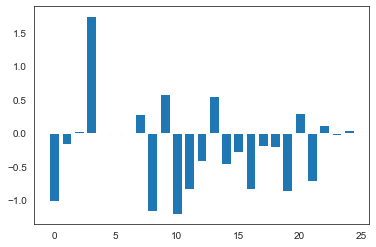

In [34]:
# summarize feature importance
sns.set_style(style='white')

new = {"i":[], "v":[]}
for i, v in enumerate(importance):
    new["i"].append(i)
    new["v"].append(v)
    print('Feature: %0d, Score: %.5f' % (i, v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.grid(False)
plt.show()

In [35]:
new = pd.DataFrame(new)
new["abs"] = abs(new.v)
new = new.sort_values(by=['abs'],ascending=True)
new

,i,v,abs
4,4,-0.003288,0.003288
6,6,0.003431,0.003431
5,5,-0.014167,0.014167
2,2,0.023301,0.023301
23,23,-0.026580,0.026580
24,24,0.045116,0.045116
22,22,0.111481,0.111481
1,1,-0.167796,0.167796
17,17,-0.196976,0.196976
18,18,-0.204991,0.204991


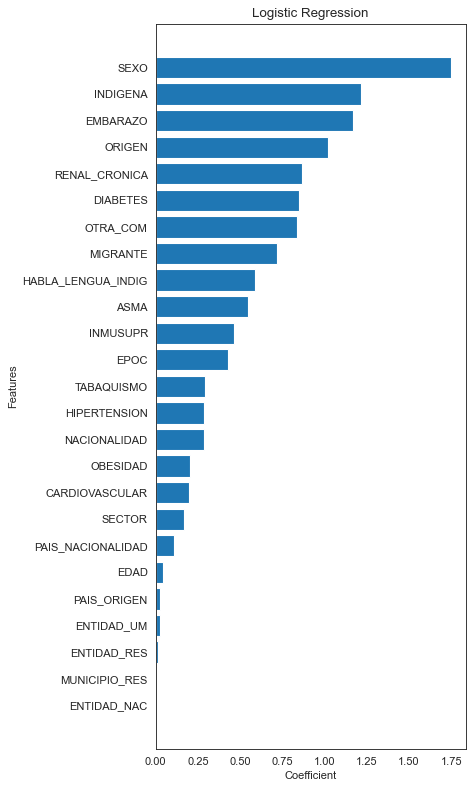

In [36]:
new["labels"] = x.columns[new.i]
from matplotlib.pyplot import figure
figure(figsize=(5, 12), dpi=80)
plt.barh([x for x in range(len(new["abs"]))], new["abs"])
plt.ylabel("Features")
plt.xlabel("Coefficient")
plt.title("Logistic Regression")

col = [x for x in new.labels]
plt.yticks(np.arange(len(col)), col)
plt.show()

In [37]:
predictions = lr.predict(X_test)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.91      0.98      0.94      1315
           2       0.69      0.29      0.41       185

    accuracy                           0.90      1500
   macro avg       0.80      0.64      0.68      1500
weighted avg       0.88      0.90      0.88      1500



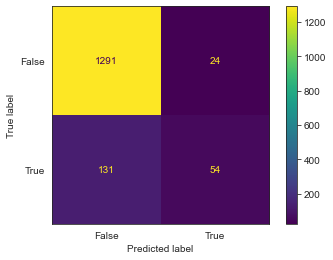

In [39]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.grid(False)
plt.show()

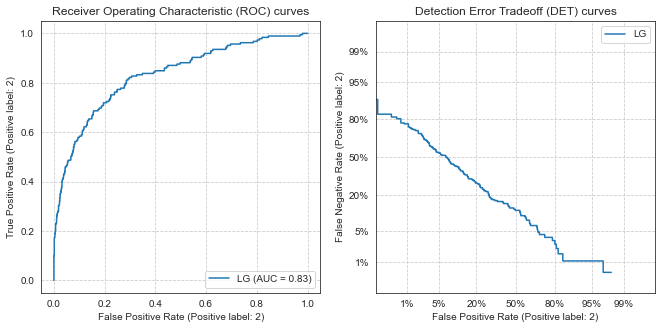

In [40]:
# prepare plots
sns.set_style(style='white')
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

RocCurveDisplay.from_estimator(lr, X_test, y_test, ax=ax_roc, name="LG")

DetCurveDisplay.from_estimator(lr, X_test, y_test, ax=ax_det, name="LG")

ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")

ax_det.set_title("Detection Error Tradeoff (DET) curves")

ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")

plt.legend()

plt.show()

Drop features who show poor predictive power

In [7]:
df = df.loc[:, ~df.columns.isin(["HABLA_LENGUA_INDIG","ENTIDAD_NAC","MUNICIPIO_RES","PAIS_ORIGEN","PAIS_NACIONALIDAD"])]

In [42]:
### Pipeline

Constructing Pipeline for model testing

In [8]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X_train, y_train, cv=5, n_jobs = 3, verbose=1, scoring=None, refit=False):

        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X_train,y_train)
            self.grid_searches[key] = gs

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
                 'cv1':scores[0],
                 'cv2':scores[1],
                 'cv3':scores[2],
                 'cv4':scores[3],
                 'cv5':scores[4]
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]

                scores.append(r.reshape(len(params),1))


            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score','cv1','cv2','cv3','cv4','cv5']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]


Defining models and its parameters

In [94]:

models1 = {
    'Bayesian Classifier':GaussianNB(),
    'NN':MLPClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
      'Decision Trees':tree.DecisionTreeClassifier()
}

models2 = {
    'SVC': SVC(),
    'Nearest neighbor':KNeighborsClassifier()}

params1 = {
    'Nearest neighbor': {'leaf_size': 5, 'n_neighbors': 5, 'p':[1,2]},
    'Bayesian Classifier':{'var_smoothing': np.logspace(0,-9, num=100)},
    'Decision Trees':{'criterion': ['gini','entropy'], 'max_depth':range(1,10), 'min_samples_split':range(1,10), 'min_samples_leaf':range(1,5),},
    'NN': {'max_iter': [1000, 1200],'hidden_layer_sizes': [(3), (3,2), (4)],'activation': ['tanh', 'relu'],'solver': ['adam'],'alpha': [0.0001, 0.05]},
    'RandomForestClassifier': { 'n_estimators': [16, 32] },
    'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
    'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ]
}


params2 = {
    'SVC': [{'kernel': ['linear'], 'C': [1, 10]},{'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]}],
            'Nearest neighbor': {'leaf_size': 5, 'n_neighbors': 5, 'p':[1,2]}
}

params3 = {
    'Nearest neighbor': {'leaf_size': range(1,50), 'n_neighbors': range(1,30), 'p':[1,2]},
    'Bayesian Classifier':{'var_smoothing': np.logspace(0,-9, num=100)},
    'Decision Trees':{'criterion': ['gini','entropy'], 'max_depth':range(1,10), 'min_samples_split':range(1,10), 'min_samples_leaf':range(1,5),},
    'NN': {'max_iter': [1000, 1200],'hidden_layer_sizes': [(3), (3,2), (4)],'activation': ['tanh', 'relu'],'solver': ['adam'],'alpha': [0.0001, 0.05]},
    'RandomForestClassifier': { 'n_estimators': [16, 32] },
    'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
    'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ]
}


#### Undersample
Balancing the data-set by equalizing the number of positive and negative outcomes (in this case the total number of negative cases (TIPO_PACIENTE==2))

In [11]:
df_minority = df[df.TIPO_PACIENTE == 2]
df_majority = df[df.TIPO_PACIENTE == 1]

In [12]:
from sklearn.utils import resample
# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                 replace=False,    # sample without replacement
                                 n_samples=sum([1 if i==2 else 0 for i in df['TIPO_PACIENTE']]),     # to match minority class
                                 random_state=123)

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
df_downsampled.TIPO_PACIENTE.value_counts()


1    506758
2    506758
Name: TIPO_PACIENTE, dtype: int64

### Unsupervised Learning

#### Clustering - Kmeans

We used K-Prototypes algorithm for clustering. K-prototypes is an extension of the K-means algorithm but is more suitable for clustering mixed type of data [1]. In k-prototypes, each cluster is represented by a prototype, which is a combination of a numeric vector and a categorical vector. The distance between two points is calculated using both the numerical and categorical attributes.

In [13]:
y = df_downsampled.TIPO_PACIENTE
x = df_downsampled.drop('TIPO_PACIENTE', axis=1)

In [14]:
# Get the position of categorical columns
catColumnsPos = [x.columns.get_loc(col) for col in list(x.select_dtypes('category').columns)]
print('Categorical columns           : {}'.format(list(df.select_dtypes('category').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'SEXO', 'ENTIDAD_RES', 'TIPO_PACIENTE', 'NACIONALIDAD', 'EMBARAZO', 'INDIGENA', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', 'MIGRANTE']
Categorical columns position  : [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [15]:
# Convert dataframe to matrix
dfMatrix = x.to_numpy()

In [ ]:
#https://medium.com/@shailja.nitp2013/k-modesclustering-ef6d9ef06449
# Choose optimal K using Elbow method
# Import module for data visualization
from plotnine import *
import plotnine
# Import module for k-protoype cluster
from kmodes.kprototypes import KPrototypes

cost = []
for cluster in range(1, 5):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 5), 'Cost':cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

Cluster initiation: 1
Cluster initiation: 2


In [16]:
# Fit the cluster
from plotnine import *
import plotnine
# Import module for k-protoype cluster
from kmodes.kprototypes import KPrototypes


kprototype = KPrototypes(n_jobs = -1, n_clusters = 2, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([1, 1, 1, ..., 0, 1, 0], dtype=uint16)

Despite the elbow method could also suggest 3/4 clusters, we selected 2 clusters (following the structure of TIPO_PACIENTE)

In [17]:
# Add the cluster to the dataframe
x['label'] = kprototype.labels_
#x['label'] = x['Cluster Labels'].map({0:'1', 1:'2'})
x['label'] = x['label'].astype('category')

Running the pipeline

During the training phase, hyperparameter tuning was achieved by using exhaustive search through GridSearch with 5-fold cross-validation to achieve the model with the highest accuracy.

In [18]:
#70%/30% train/test
X_train, X_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.3, random_state=42)

In [19]:
#You create a EstimatorSelectionHelper by passing the models and the parameters, and then call the fit() function,
# which as signature similar to the original GridSearchCV object.
helper1 = EstimatorSelectionHelper(models1,params1)
helper1.fit(X_train, y_train, n_jobs=2,cv=5, verbose = 1)

Running GridSearchCV for Bayesian Classifier.
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Running GridSearchCV for Decision Trees.
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Running GridSearchCV for NN.
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Running GridSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Running GridSearchCV for AdaBoostClassifier.
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Running GridSearchCV for GradientBoostingClassifier.
Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [20]:
helper1.score_summary(sort_by='mean_score')

Bayesian Classifier
Decision Trees
NN
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier


,estimator,min_score,mean_score,max_score,std_score,cv1,cv2,cv3,cv4,cv5,...,max_depth,min_samples_leaf,min_samples_split,activation,alpha,hidden_layer_sizes,max_iter,solver,n_estimators,learning_rate
779,GradientBoostingClassifier,0.818954,0.820082,0.822195,0.00133,0.818954,0.819104,0.822195,0.821114,0.819042,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,1.0
777,GradientBoostingClassifier,0.818485,0.819788,0.822044,0.001386,0.820727,0.818569,0.822044,0.819114,0.818485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,0.8
773,RandomForestClassifier,0.811427,0.813649,0.816168,0.001572,0.813213,0.814376,0.816168,0.811427,0.813059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,NaN
778,GradientBoostingClassifier,0.810645,0.813009,0.814648,0.001693,0.810645,0.811336,0.814642,0.814648,0.813773,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,1.0
772,RandomForestClassifier,0.811273,0.812749,0.814909,0.001218,0.812592,0.812938,0.814909,0.811273,0.812034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Bayesian Classifier,0.667102,0.667292,0.667524,0.000137,0.667524,0.667228,0.667297,0.667102,0.66731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Bayesian Classifier,0.667095,0.667292,0.667518,0.000137,0.667518,0.667228,0.667307,0.667095,0.667313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Bayesian Classifier,0.667092,0.667292,0.667524,0.00014,0.667524,0.667228,0.667307,0.667092,0.66731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
754,NN,0.486333,0.6649,0.777885,0.113841,0.777885,0.776291,0.584159,0.486333,0.699832,...,NaN,NaN,NaN,tanh,0.05,3,1000,adam,NaN,NaN


In [22]:
data = helper1.score_summary()
models = {}
for val in data.loc[:,"estimator"]:
    models[val] = (0,0,0)

index = 0
for row in data.iloc[:,0]:
    if models[data.iloc[index,0]][0] < data.iloc[index, 2]:
        models[data.iloc[index,0]] = (data.iloc[index,2],data.iloc[index,4],index)

    index+=1

models

Bayesian Classifier
Decision Trees
NN
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier


{'GradientBoostingClassifier': (0.8200818135146072, 0.001329780071786215, 0),
 'RandomForestClassifier': (0.8136488106838918, 0.0015716681041168024, 2),
 'Decision Trees': (0.8085875948389083, 0.0014594738701561804, 6),
 'AdaBoostClassifier': (0.7910187894161955, 0.0010185147158250254, 366),
 'NN': (0.7851349821907723, 0.008194664765158314, 367),
 'Bayesian Classifier': (0.7615201971652763, 0.0008355115980569177, 528)}

In [98]:
#data.to_csv("data_balanced.csv")

In [85]:
data.iloc[[0,2,6,366,367,528]]

,estimator,min_score,mean_score,max_score,std_score,cv1,cv2,cv3,cv4,cv5,...,max_depth,min_samples_leaf,min_samples_split,activation,alpha,hidden_layer_sizes,max_iter,solver,n_estimators,learning_rate
779,GradientBoostingClassifier,0.818954,0.820082,0.822195,0.00133,0.818954,0.819104,0.822195,0.821114,0.819042,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,1.0
773,RandomForestClassifier,0.811427,0.813649,0.816168,0.001572,0.813213,0.814376,0.816168,0.811427,0.813059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,NaN
716,Decision Trees,0.806585,0.808588,0.810647,0.001459,0.80733,0.809411,0.810647,0.806585,0.808964,...,9,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
775,AdaBoostClassifier,0.789269,0.791019,0.792164,0.001019,0.792164,0.791011,0.791884,0.789269,0.790766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,NaN
770,NN,0.770074,0.785135,0.794359,0.008195,0.770074,0.787178,0.784534,0.78953,0.794359,...,NaN,NaN,NaN,relu,0.05,4,1000,adam,NaN,NaN
95,Bayesian Classifier,0.760159,0.76152,0.762465,0.000836,0.762465,0.760159,0.7611,0.761609,0.762268,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
BGC = data.iloc[models["GradientBoostingClassifier"][2],[5,6,7,8,9]]
ABC = data.iloc[models["AdaBoostClassifier"][2],[5,6,7,8,9]]
RFC = data.iloc[models["RandomForestClassifier"][2],[5,6,7,8,9]]
DT = data.iloc[models["Decision Trees"][2],[5,6,7,8,9]]
NN = data.iloc[models["NN"][2],[5,6,7,8,9]]
BC = data.iloc[models["Bayesian Classifier"][2],[5,6,7,8,9]]

In [41]:
balanced = data.iloc[[0,239,241,243,584,679],]

In [24]:
from scipy.stats import f_oneway

# Perform ANOVA
#f_statistic, p_value = f_oneway(BGC, ABC, RFC, DT, NN, BC)

#print("F-statistic:", f_statistic)
#print("P-value:", p_value)


plot = pd.DataFrame({"BGC":BGC, "ABC":ABC, "RFC":RFC, "DT":DT, "NN":NN, "BC":BC})
df_melt = pd.melt(plot.reset_index(), id_vars=['index'], value_vars=['BGC', 'ABC', 'RFC', 'DT','NN','BC'])
# replace column names
df_melt.columns = ['index', 'models', 'value']
df_melt['value'] = pd.to_numeric(df_melt['value'])


from bioinfokit.analys import stat

res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(models)')
res.anova_summary




,df,sum_sq,mean_sq,F,PR(>F)
C(models),5.0,0.011895,0.002379,151.73217,2.401271e-17
Residual,24.0,0.000376,0.000016,NaN,NaN


In [25]:
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='models', anova_model='value ~ C(models)')
res.tukey_summary

C:\Users\nunok\PycharmProjects\ICD\venv\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,BGC,ABC,0.029063,0.021320,0.036806,16.412488,0.001000
1,BGC,RFC,0.006433,-0.001310,0.014176,3.632849,0.144034
2,BGC,DT,0.011494,0.003751,0.019238,6.491022,0.001470
3,BGC,NN,0.034947,0.027203,0.042690,19.735194,0.001000
4,BGC,BC,0.058562,0.050818,0.066305,33.070949,0.001000
5,ABC,RFC,0.022630,0.014887,0.030373,12.779638,0.001000
6,ABC,DT,0.017569,0.009825,0.025312,9.921466,0.001000
7,ABC,NN,0.005884,-0.001860,0.013627,3.322707,0.213902
8,ABC,BC,0.029499,0.021755,0.037242,16.658462,0.001000
9,RFC,DT,0.005061,-0.002682,0.012805,2.858173,0.360922


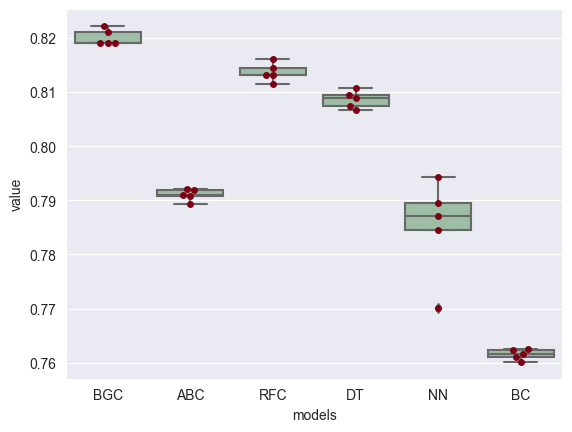

In [26]:
ax = sns.boxplot(x='models', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="models", y="value", data=df_melt, color='#7d0013')
plt.show()

For the balanced dataset, the model with the highest mean accuracy for 5-fold cross-validation was the Gradient Boosting Classifier (M = 0.82; SD = 0.01). Analysis of variance (ANOVA) indicated there were differences between the models, F(5,24) = 151.73, p < .001. Post hoc analyses were conducted using Tukey's post-hoc test. Post-hocs suggested that the Gradient Boosting Classifier performed better with respect to all models, except to the Random Forest based on a Tukey's value of CD = 3.63, p = .14.

#### Non-balanced dataset

In [24]:
y = df.TIPO_PACIENTE
x = df.drop('TIPO_PACIENTE', axis=1)

In [60]:
#### Clustering - KPrototypes

Despite the elbow method could also suggest 4 clusters, we selected 2 clusters (following the structure of TIPO_PACIENTE)

In [25]:
# Get the position of categorical columns
catColumnsPos = [x.columns.get_loc(col) for col in list(x.select_dtypes('category').columns)]
print('Categorical columns           : {}'.format(list(df.select_dtypes('category').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'SEXO', 'ENTIDAD_RES', 'TIPO_PACIENTE', 'NACIONALIDAD', 'EMBARAZO', 'INDIGENA', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', 'MIGRANTE']
Categorical columns position  : [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [26]:
# Convert dataframe to matrix
dfMatrix = x.to_numpy()

In [27]:
# Fit the cluster
from plotnine import *
import plotnine
# Import module for k-protoype cluster
from kmodes.kprototypes import KPrototypes


kprototype = KPrototypes(n_jobs = -1, n_clusters = 2, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([0, 1, 1, ..., 0, 1, 0], dtype=uint16)

In [28]:
# Add the cluster to the dataframe
x['label'] = kprototype.labels_
#x['label'] = x['Cluster Labels'].map({0:'1', 1:'2'})
x['label'] = x['label'].astype('category')

Running the pipeline

In [29]:
#70%/30% train/test
X_train, X_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.3, random_state=42)

In [95]:
helper2 = EstimatorSelectionHelper(models1, params1)
helper2.fit(X_train, y_train, n_jobs=2,cv=5)

Running GridSearchCV for Bayesian Classifier.
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Running GridSearchCV for NN.
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Running GridSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Running GridSearchCV for AdaBoostClassifier.
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Running GridSearchCV for GradientBoostingClassifier.
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Running GridSearchCV for Decision Trees.
Fitting 5 folds for each of 648 candidates, totalling 3240 fits


In [96]:
helper2.score_summary(sort_by='mean_score')

Bayesian Classifier
NN
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
Decision Trees


,estimator,min_score,mean_score,max_score,std_score,cv1,cv2,cv3,cv4,cv5,...,alpha,hidden_layer_sizes,max_iter,solver,n_estimators,learning_rate,criterion,max_depth,min_samples_leaf,min_samples_split
129,GradientBoostingClassifier,0.943307,0.943587,0.943796,0.000187,0.943469,0.94358,0.943796,0.943785,0.943307,...,NaN,NaN,NaN,NaN,32,0.8,NaN,NaN,NaN,NaN
454,Decision Trees,0.943418,0.943493,0.943589,0.000069,0.94343,0.94356,0.943468,0.943418,0.943589,...,NaN,NaN,NaN,NaN,NaN,NaN,gini,9,4,8
451,Decision Trees,0.943418,0.943493,0.943589,0.000069,0.94343,0.94356,0.943468,0.943418,0.943589,...,NaN,NaN,NaN,NaN,NaN,NaN,gini,9,4,5
448,Decision Trees,0.943419,0.943493,0.943592,0.00007,0.943428,0.94356,0.943465,0.943419,0.943592,...,NaN,NaN,NaN,NaN,NaN,NaN,gini,9,4,2
450,Decision Trees,0.943418,0.943493,0.943592,0.00007,0.943428,0.943559,0.943466,0.943418,0.943592,...,NaN,NaN,NaN,NaN,NaN,NaN,gini,9,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,Bayesian Classifier,0.92621,0.926258,0.926328,0.00004,0.92621,0.926269,0.926239,0.926245,0.926328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Bayesian Classifier,0.926205,0.926253,0.926324,0.00004,0.926205,0.926267,0.926234,0.926238,0.926324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,Bayesian Classifier,0.926198,0.926246,0.92632,0.000042,0.926198,0.926261,0.926226,0.926226,0.92632,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,Bayesian Classifier,0.926194,0.926243,0.926302,0.000041,0.926194,0.92628,0.926213,0.926226,0.926302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:

data = helper2.score_summary()
models = {}
for val in data.loc[:, "estimator"]:
    models[val] = (0, 0, 0)

index = 0
for row in data.iloc[:, 0]:
    if models[data.iloc[index, 0]][0] < data.iloc[index, 2]:
        models[data.iloc[index, 0]] = (data.iloc[index, 2], data.iloc[index, 4], index)

    index += 1

models




Bayesian Classifier
NN
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
Decision Trees


{'GradientBoostingClassifier': (0.9435874993267948, 0.00018733581834879507, 0),
 'Decision Trees': (0.9434931591367555, 6.94150220517476e-05, 1),
 'RandomForestClassifier': (0.9420298762056131, 0.00016258553489964154, 146),
 'NN': (0.9392736883051105, 0.00037827634151465286, 330),
 'AdaBoostClassifier': (0.9392323159727477, 0.0002585027921694132, 331),
 'Bayesian Classifier': (0.9321904359334873, 0.00014854936602024896, 608)}

In [100]:
data.iloc[[0,1,146,330,331,608]]

,estimator,min_score,mean_score,max_score,std_score,cv1,cv2,cv3,cv4,cv5,...,alpha,hidden_layer_sizes,max_iter,solver,n_estimators,learning_rate,criterion,max_depth,min_samples_leaf,min_samples_split
129,GradientBoostingClassifier,0.943307,0.943587,0.943796,0.000187,0.943469,0.94358,0.943796,0.943785,0.943307,...,NaN,NaN,NaN,NaN,32,0.8,NaN,NaN,NaN,NaN
454,Decision Trees,0.943418,0.943493,0.943589,0.000069,0.94343,0.94356,0.943468,0.943418,0.943589,...,NaN,NaN,NaN,NaN,NaN,NaN,gini,9,4,8
125,RandomForestClassifier,0.941797,0.94203,0.942265,0.000163,0.941797,0.941993,0.94215,0.941945,0.942265,...,NaN,NaN,NaN,NaN,32,NaN,NaN,NaN,NaN,NaN
116,NN,0.938799,0.939274,0.939668,0.000378,0.939587,0.939668,0.938799,0.938834,0.93948,...,0.0001,4,1000,adam,NaN,NaN,NaN,NaN,NaN,NaN
127,AdaBoostClassifier,0.938906,0.939232,0.939565,0.000259,0.939456,0.938906,0.939565,0.938974,0.93926,...,NaN,NaN,NaN,NaN,32,NaN,NaN,NaN,NaN,NaN
99,Bayesian Classifier,0.932034,0.93219,0.932473,0.000149,0.932173,0.932473,0.932034,0.932133,0.93214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
#data.to_csv("data_imbalanced.csv")

In [102]:
BGC = data.iloc[models["GradientBoostingClassifier"][2],[5,6,7,8,9]]
ABC = data.iloc[models["AdaBoostClassifier"][2],[5,6,7,8,9]]
RFC = data.iloc[models["RandomForestClassifier"][2],[5,6,7,8,9]]
DT = data.iloc[models["Decision Trees"][2],[5,6,7,8,9]]
NN = data.iloc[models["NN"][2],[5,6,7,8,9]]
BC = data.iloc[models["Bayesian Classifier"][2],[5,6,7,8,9]]

In [103]:
plot = pd.DataFrame({"BGC":BGC, "ABC":ABC, "RFC":RFC, "DT":DT, "NN":NN, "BC":BC})
df_melt = pd.melt(plot.reset_index(), id_vars=['index'], value_vars=['BGC', 'ABC', 'RFC', 'DT','NN','BC'])
# replace column names
df_melt.columns = ['index', 'models', 'value']
df_melt['value'] = pd.to_numeric(df_melt['value'])


from bioinfokit.analys import stat

res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(models)')
res.anova_summary


,df,sum_sq,mean_sq,F,PR(>F)
C(models),5.0,0.000456,9.129266e-05,1468.855199,5.148456e-29
Residual,24.0,0.000001,6.215225e-08,NaN,NaN


In [104]:
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='models', anova_model='value ~ C(models)')
res.tukey_summary

C:\Users\nunok\PycharmProjects\ICD\venv\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,BGC,ABC,0.004355,0.003868,0.004843,39.062768,0.001
1,BGC,RFC,0.001558,0.001070,0.002045,13.970725,0.001
2,BGC,DT,0.000094,-0.000393,0.000582,0.846162,0.900
3,BGC,NN,0.004314,0.003826,0.004801,38.691689,0.001
4,BGC,BC,0.011397,0.010910,0.011885,102.223214,0.001
5,ABC,RFC,0.002798,0.002310,0.003285,25.092042,0.001
6,ABC,DT,0.004261,0.003773,0.004748,38.216606,0.001
7,ABC,NN,0.000041,-0.000446,0.000529,0.371079,0.900
8,ABC,BC,0.007042,0.006554,0.007529,63.160446,0.001
9,RFC,DT,0.001463,0.000976,0.001951,13.124564,0.001


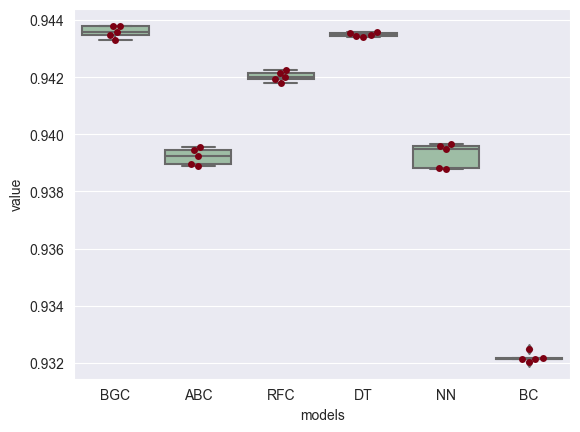

In [105]:
ax = sns.boxplot(x='models', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="models", y="value", data=df_melt, color='#7d0013')
plt.show()

For the original dataset (unbalanced) the models which showed the higher mean in the 5-fold cross validation were Gradient Boosting Classifier (M = 0.94; SD = 0.01), as in the balanced datased, and the Decision Tree (M = 0.94; SD = 0.01). Once again, ANOVA showed differences between models, F(5,24) = 1468.86, p < .001. Post-hocs comparisons using the Tukey-HSD test confirmed that these models performed better than others, but did not significantly differ between themselves based on a Tukey's value of CD = 3.63, p = .90.

In [106]:
models

{'GradientBoostingClassifier': (0.9435874993267948, 0.00018733581834879507, 0),
 'Decision Trees': (0.9434931591367555, 6.94150220517476e-05, 1),
 'RandomForestClassifier': (0.9420298762056131, 0.00016258553489964154, 146),
 'NN': (0.9392736883051105, 0.00037827634151465286, 330),
 'AdaBoostClassifier': (0.9392323159727477, 0.0002585027921694132, 331),
 'Bayesian Classifier': (0.9321904359334873, 0.00014854936602024896, 608)}

In [110]:
#add all models.....
params = {
    "GradientBoostingClassifier_b" : {'n_estimators' : 32, 'learning_rate' : 1},
    "Decision Trees_b" : {'criterion' : 'entropy', 'max_depth' : 9, 'min_samples_leaf' : 1, 'min_samples_split' : 5},
    "RandomForestClassifier_b/n" : {'n_estimators' : 32},
    "NN_b/n" : {'activation' : 'relu', 'alpha' : 0.05, 'hidden_layer_sizes' : 4, 'max_iter' : 1000, 'solver' : 'adam'},
    "AdaBoostClassifier_b/n" : {'n_estimators' : 32},
    "Bayesian Classifier_b/n" : {'var_smoothing' : 0},

    "GradientBoostingClassifier_n" : {'n_estimators' : 32, 'learning_rate' : 0.8},
    "Decision Trees_n" : {'criterion' : 'gini', 'max_depth' : 9, 'min_samples_leaf' : 4, 'min_samples_split' : 8}

}


models = {
    'GradientBoostingClassifier_b': GradientBoostingClassifier(**params['GradientBoostingClassifier_b']),
    'Decision Trees_b': tree.DecisionTreeClassifier(**params['Decision Trees_b']),
    'RandomForestClassifier_b/n': RandomForestClassifier(**params['RandomForestClassifier_b/n']),
    'NN_b/n': MLPClassifier(**params['NN_b/n']),
    'AdaBoostClassifier_b/n': AdaBoostClassifier(**params['AdaBoostClassifier_b/n']),
    'Bayesian Classifier_b/n': GaussianNB(**params['Bayesian Classifier_b/n']),

    'GradientBoostingClassifier_n': GradientBoostingClassifier(**params['GradientBoostingClassifier_n']),
    'Decision Trees_n': tree.DecisionTreeClassifier(**params['Decision Trees_n'])
}


### Model Evaluation

In [38]:
from sklearn.metrics import roc_curve,auc
class Evaluation:

    def __init__(self, models):
        self.models = models
        self.predictions = {}

    def fit(self, X_train, y_train, X_test, y_test):

        for key in self.models:
            model = self.models[key]
            model.fit(X_train,y_train)
            predictions = model.predict(X_test)
            self.predictions[key] = predictions

            # Calculate the ROC curve for a model
            fpr, tpr, thresholds = roc_curve(y_test, predictions, pos_label=2)

            # Plot the ROC curve
            auc = round(metrics.roc_auc_score(y_test, predictions), 2)
            plt.plot(fpr, tpr, label = str(key) + ", AUC="+str(auc))

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()



    def score_summary(self, chosen):
        from sklearn.metrics import classification_report
        print(chosen)
        print(confusion_matrix(y_test, self.predictions[chosen]))
        print(classification_report(y_test, self.predictions[chosen]))



In [130]:
eval = Evaluation(models)

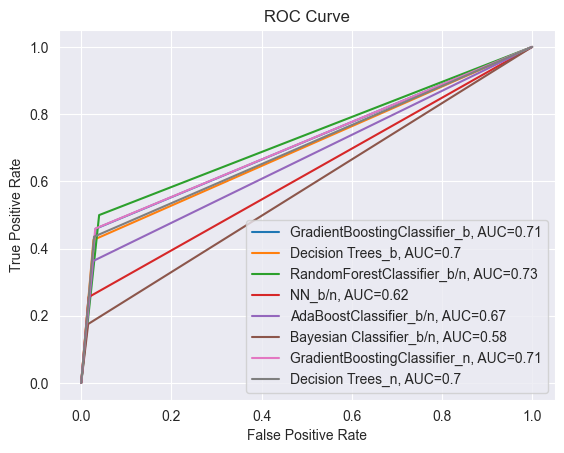

In [131]:
eval.fit(X_train,y_train,X_test,y_test)

In [132]:
eval.score_summary("RandomForestClassifier_b/n")

RandomForestClassifier_b/n
[[943023  39082]
 [ 75966  75821]]
              precision    recall  f1-score   support

           1       0.93      0.96      0.94    982105
           2       0.66      0.50      0.57    151787

    accuracy                           0.90   1133892
   macro avg       0.79      0.73      0.76   1133892
weighted avg       0.89      0.90      0.89   1133892



### Test-set results

We expected that the best model in the test set would be the Gradient Boosting Classifier as it showed to be the best model in both training sets. However, it is not uncommon for a machine learning model to perform differently on the training data compared to the test data. This can be due to a variety of factors such as overfitting, underfitting, or differences in the distribution of the training and test data. In this case, it appears that the Random Forest Classifier was the best performing model on the test data, with an AUC of 0.7.

Gradient boosting and random forests are both ensemble learning methods, which means that they use a group of weak learners and combine their predictions to get a final result. Gradient boosting trains models sequentially, with each model trying to correct the mistakes of the previous model while in Random Forest the weak models are trained in parallel, thus independently. Overall, boosting methods tend to perform better, but are more prone to overfitting as occurred in the present work [3].


On the other hand, Bayesian Classifier, consistently, showed poor results both for the training phases and in the test-set. This may be attributed to the correlation of the features. We suggest that a possible solution to deal with this problem would be performing dimensionality reduction techniques, such as Multiple Corresponding Analysis (MCA) on the categorical features.

### Fine-Tuning Random Forest on the Original Dataset (using F1-Macro scoring)

During the training phase, hyperparameter tuning was achieved by using exhaustive search through GridSearch to find the model with the highest 5-fold cross-validation accuracy. However, as confirmed in our case, accuracy could be misleading especially when the classes are imbalanced, simply by predicting the most common class all the time, even if it does not perform well at predicting the rare class [2].


F1 score is a metric that combines precision and recall. It is calculated using the following formula:


$$F1 = \frac{2 * (\text{precision} * \text{recall})}{\text{precision} + \text{recall}}$$

F-1 Macro is the geometric mean of the two classes' F1 scores. F-1 Macro score was chosen as our objective was to find a model with a good balance between precison and recall for the two classes, as we assumed a similar cost between a false negative (
neglects potential necessary medical intervention) and a false positive (overcrowding in emergency department and shortages of hospital staff).  We expect an improvement in the AUC, as in previous phases hyperparameter tuning for the Random Forest was only achieved for the number of trees.


### Randomized Grid Search

In [18]:
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [20]:
# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier()
# Random search of parameters, using 3-fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring = 'f1_macro')
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\nunok\PycharmProjects\ICD\venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
54 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nunok\PycharmProjects\ICD\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nunok\PycharmProjects\ICD\venv\lib\site-packages\sklearn\ensemble\_forest.py", line 474, in fit
    trees = Parallel(
  File "C:\Users\nunok\PycharmProjects\ICD\venv\lib\site-packages\joblib\parallel.py", line 1088, in __call__
    while self.dispatch_one_batch(it

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='f1_macro', verbose=2)

In [21]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [26]:
#add all models.....
params = {
    "RandomForestClassifier_random" : {'n_estimators' : 100,
                                       'min_samples_split' : 10,
                                       'min_samples_leaf' : 2,
                                       'max_features' : 'sqrt',
                                       'max_depth' : 50,
                                       'bootstrap' : True},
    "RandomForestClassifier" : {'n_estimators' : 32}
}


models = {
    'RandomForestClassifier_random': RandomForestClassifier(**params['RandomForestClassifier_random']),
    'RandomForestClassifier': RandomForestClassifier(**params['RandomForestClassifier'])
}

In [27]:
eval_random = Evaluation(models)

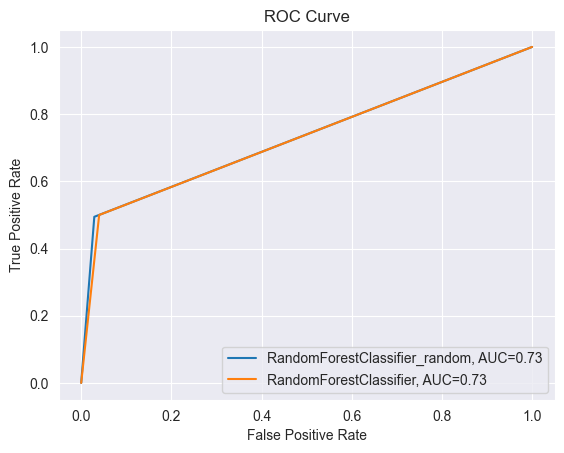

In [29]:
eval_random.fit(X_train,y_train,X_test,y_test)

In [31]:
eval_random.score_summary("RandomForestClassifier_random")

RandomForestClassifier_random
[[953555  28550]
 [ 76738  75049]]
              precision    recall  f1-score   support

           1       0.93      0.97      0.95    982105
           2       0.72      0.49      0.59    151787

    accuracy                           0.91   1133892
   macro avg       0.82      0.73      0.77   1133892
weighted avg       0.90      0.91      0.90   1133892



### Validation Curves

In [ ]:
from sklearn.model_selection import validation_curve

train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train,
                                param_name = 'n_estimators',
                                param_range = [30,50,80,100], cv = 3, scoring = 'f1_macro')

In [22]:
def plot_curve(train_score, test_score, parameter, parameter_range):
    # Calculating mean and standard deviation of training score
    mean_train_score = np.mean(train_score, axis = 1)
    std_train_score = np.std(train_score, axis = 1)

    # Calculating mean and standard deviation of testing score
    mean_test_score = np.mean(test_score, axis = 1)
    std_test_score = np.std(test_score, axis = 1)

    # Plot mean accuracy scores for training and testing scores
    plt.plot(parameter_range, mean_train_score,
         label = "Training Score", color = 'b')
    plt.plot(parameter_range, mean_test_score,
       label = "Cross Validation Score", color = 'g')

    # Creating the plot
    plt.title("Validation Curve with RF Classifier")
    plt.xlabel(parameter)
    plt.ylabel("F1-Macro")
    plt.tight_layout()
    plt.legend(loc = 'best')

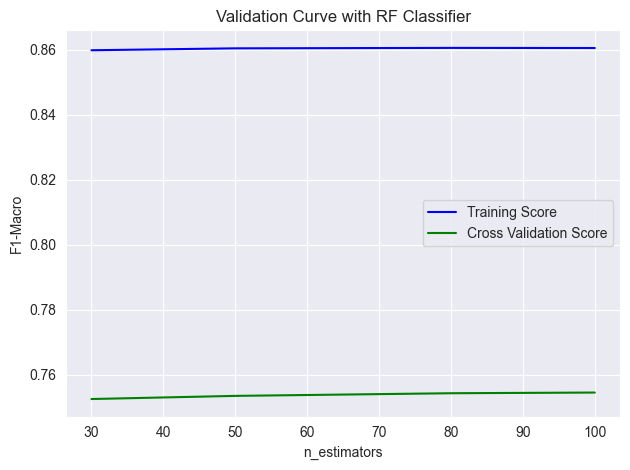

In [169]:
plot_curve(train_scoreNum, test_scoreNum, "n_estimators", [30,50,80,100])

In [30]:
train_scoreNum1, test_scoreNum1 = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train,
                                param_name = 'min_samples_split',
                                param_range = [2,5,10], cv = 3, scoring = 'f1_macro')

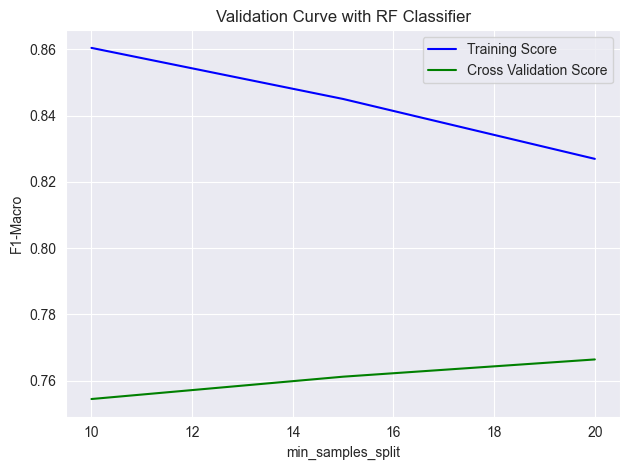

In [31]:
plot_curve(train_scoreNum1,test_scoreNum1, "min_samples_split", [10,15,20])


In [32]:

train_scoreNum2, test_scoreNum2 = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train,
                                param_name = 'min_samples_leaf',
                                param_range = [1,2,4], cv = 3, scoring = 'f1_macro')

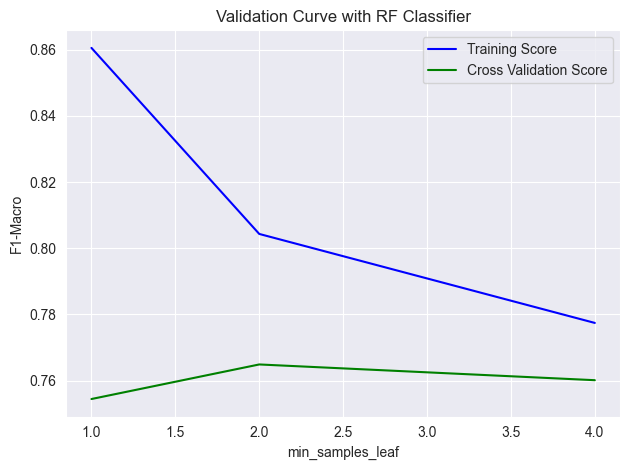

In [33]:
plot_curve(train_scoreNum2,test_scoreNum2, "min_samples_leaf", [1,2,4])

### Balanced Dataset

In [17]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 30, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [4, 10, 20, 30]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [30, 37, 45, 53, 61, 68, 76, 84, 92, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [4, 10, 20, 30], 'bootstrap': [True, False]}


In [19]:
rf = RandomForestClassifier()
# Random search of parameters, using 3-fold cross validation,
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring = 'f1_macro')

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\nunok\PycharmProjects\ICD\venv\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 10, 20, 30],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [30, 37, 45, 53, 61, 68,
                                                         76, 84, 92, 100]},
                   random_state=42, scoring='f1_macro', verbose=2)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\nunok\PycharmProjects\ICD\venv\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 10, 20, 30],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [30, 37, 45, 53, 61, 68,
                                                         76, 84, 92, 100]},
                   random_state=42, scoring='f1_macro', verbose=2)

In [20]:
rf_random.best_params_

{'n_estimators': 68,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

### Validation Curves

In [21]:
from sklearn.model_selection import validation_curve

train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train,
                                param_name = 'n_estimators',
                                param_range = [30,50,80,100], cv = 3, scoring = 'f1_macro')

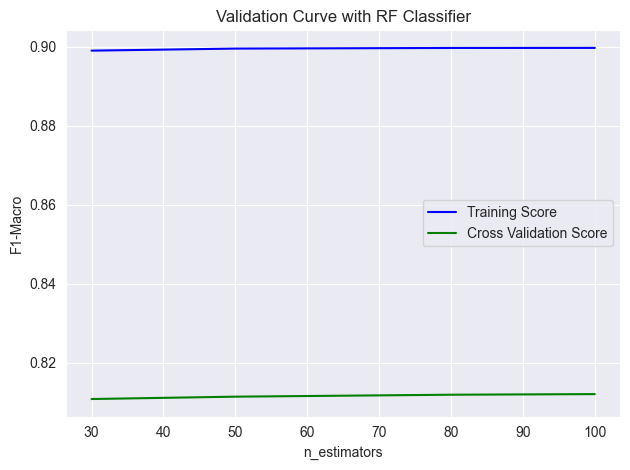

In [24]:
plot_curve(train_scoreNum,test_scoreNum, "n_estimators", [30,50,80,100])

In [25]:
train_scoreNum1, test_scoreNum1 = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train,
                                param_name = 'min_samples_leaf',
                                param_range = [10,15,20], cv = 3, scoring = 'f1_macro')

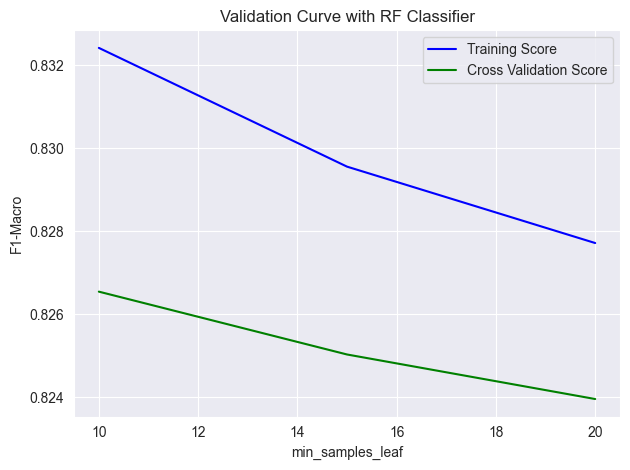

In [27]:
plot_curve(train_scoreNum1,test_scoreNum1, 'min_samples_leaf', [10,15,20])

In [20]:
train_scoreNum2, test_scoreNum2 = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train,
                                param_name = 'min_samples_split',
                                param_range = [1,2,4], cv = 3, scoring = 'f1_macro')

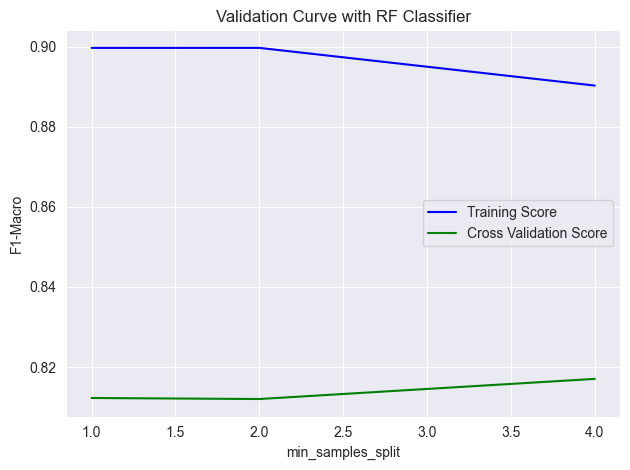

In [23]:
plot_curve(train_scoreNum2,test_scoreNum2, 'min_samples_split', [1,2,4])

In [30]:
train_scoreNum3, test_scoreNum3 = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train,
                                param_name = 'max_depth',
                                param_range = [50,60,80], cv = 3, scoring = 'f1_macro')

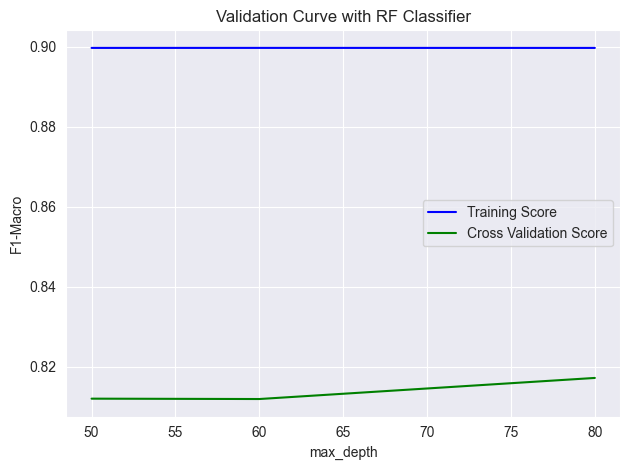

In [32]:
plot_curve(train_scoreNum3,test_scoreNum2, 'max_depth', [50,60,80])

In [39]:

params = {'imbalanced': {'n_estimators' : 100, 'min_samples_leaf' : 20, 'min_samples_split' : 2, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True},
             'balanced' : {'n_estimators': 100,'min_samples_split': 4,'min_samples_leaf': 4,'max_features': 'auto','max_depth': 100,'bootstrap': True}
}

models = {'imbalanced' : RandomForestClassifier(**params['imbalanced']),
         'balanced': RandomForestClassifier(**params['balanced'])}

eval_fine = Evaluation(models)

C:\Users\nunok\PycharmProjects\ICD\venv\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
C:\Users\nunok\PycharmProjects\ICD\venv\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.


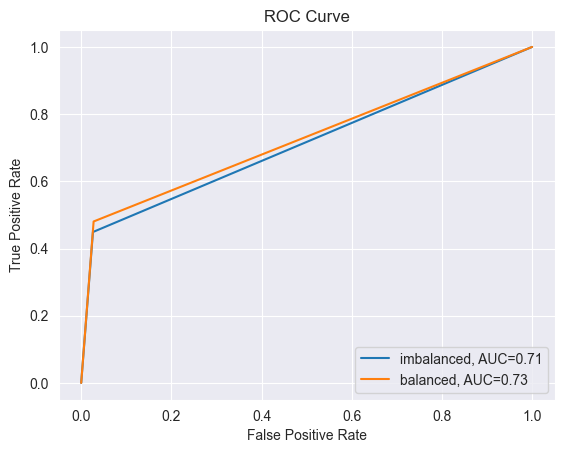

In [44]:
eval_fine.fit(X_train,y_train,X_test,y_test)

In [46]:
eval_fine.score_summary("balanced")

balanced
[[955045  27060]
 [ 78855  72932]]
              precision    recall  f1-score   support

           1       0.92      0.97      0.95    982105
           2       0.73      0.48      0.58    151787

    accuracy                           0.91   1133892
   macro avg       0.83      0.73      0.76   1133892
weighted avg       0.90      0.91      0.90   1133892



In [47]:
eval_fine.score_summary("imbalanced")

imbalanced
[[956517  25588]
 [ 83618  68169]]
              precision    recall  f1-score   support

           1       0.92      0.97      0.95    982105
           2       0.73      0.45      0.56    151787

    accuracy                           0.90   1133892
   macro avg       0.82      0.71      0.75   1133892
weighted avg       0.89      0.90      0.89   1133892



### Discussion

The present work aims to understand how COVID-19 impacts individuals given certain characteristics in order to improve hospital capacity planning and timely treatment. Therefore, our objective was to find the model which best predicts whether the patient would be a minor or a severe case, at the time of the hospital admission.

Since the original dataset was highly imbalanced towards minor cases, we dealt with the classification problem by training the models on an undersampled version of the original dataset, with balanced cases; and on the original dataset (imbalanced). During the training phase, in both samples, it was suggested that the most adequate model for the given dataset would be either Gradient Boosting Trees or a Random Forest. The test-set revealed the Random Forest outperformed the other models.

However, given the poor precision and recall of classifying the severe cases, we performed fine-tuning of the hyperparameters both on the balanced and original versions of the dataset. The fine-tuned model which showed the best test results (AUC = .73, F1-Macro = .76, Accuracy = 91%) was trained on the balanced version of the

Theoretical Implications

This work presents some theoretical implications that we would like to highlight. Firstly, the importance of balancing and/or choosing adequate metrics when dealing with imbalanced datasets. Secondly, the results confirmed that ensemble trees perform well with categorical type of data and with a high number of features. However, our results also point that boosting techniques could be more prone to overfitting than Random Forests.

Practical Implications

From a business perspective, hospitals may find our work useful for managing the available resources and the COVID-19 admissions. Moreover, this work could be easily adapted to other medical situations.

Limitations/Future directions

We were unable to fit the K-Nearest Neighbors (KNN) or Support Vector Machines (SVMs). KNN is a distance-based algorithm, which means that it relies on computing distances between data points in order to determine their similarity. SVMs works by trying to find the best decision boundary (the one which maximizes the margin) that separates the data points of different classes. Therefore, it uses distances to determine the best decision boundary. When working with categorical features, despite categories could be converted to integers, either through label encoding, as in the present work, or one-hot encoding, integers don't have any inherent meaning and may not represent the true similarity between the categories.

Further work should explore more in depth the best hyperparameter for each model through, for example, performing Random Search prior to the Grid Search. This way, one can test a wide range of parameters with fewer number of iterations. Despite our efforts to improve the prediction of severe cases, the attributes of some of these cases may not completely determine their class, as explained by the irreducible error. Therefore, future researchers may find interesting to consider this binary case as a multiclass classification problem, with an intermediate category of moderate development of the disease.


# References

In [ ]:

[1] Quiroz-Juárez MA, Torres-Gómez A,Hoyo-Ulloa I, Leo´n-Montiel RdJ, U’Ren AB (2021). Identification of high-risk COVID-19 patients using machine learning. PLoS ONE 16(9): e0257234. https://doi.org/10.1371/journal.pone.0257234

[1] Huang, Z. Extensions to the k-Means Algorithm for Clustering Large Data Sets with Categorical Values. Data Mining and Knowledge Discovery 2, 283–304 (1998). https://doi.org/10.1023/A:1009769707641

[2] Breiman, L. Random Forests. Machine Learning 45, 5–32 (2001). https://doi.org/10.1023/A:1010933404324

[3] L. A. Jeni, J. F. Cohn and F. De La Torre. Facing Imbalanced Data--Recommendations for the Use of Performance Metrics, 2013. Humaine Association Conference on Affective Computing and Intelligent Interaction, pp. 245-251, doi: 10.1109/ACII.2013.47

